In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from statistics import NormalDist
from scipy.stats import norm

In [40]:
lots = pd.read_csv('tba_lots.csv')
lots = lots.dropna(subset=['lot_quantity', 'estimated_price', 'nr_bids','highest_valid_bid_amount','nr_valid_bid_users'])
percentile_95 = lots['lot_quantity'].quantile(0.95)
# Filter  lots to discard data above the 95th percentile of lot_quantity
lots = lots[lots['lot_quantity'] <= percentile_95]
# Delete the data whose lot quantity is 0
lots = lots[lots['lot_quantity'] != 0]

#drop the rows where estimated price smaller than starting price 
lots = lots[lots['estimated_price']>lots['starting_price']]
#drop rows where estimated price is 0
lots = lots[lots['estimated_price']>0]

In [41]:
#create preformance measure
lots['ratio_auction_performance'] = np.log(lots['highest_valid_bid_amount'] / lots['estimated_price'])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


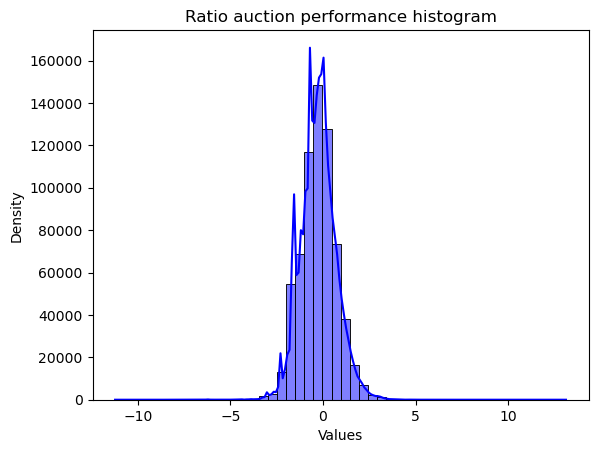

In [42]:
sns.histplot(lots['ratio_auction_performance'], bins=50, kde=True, color='blue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Ratio auction performance histogram')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


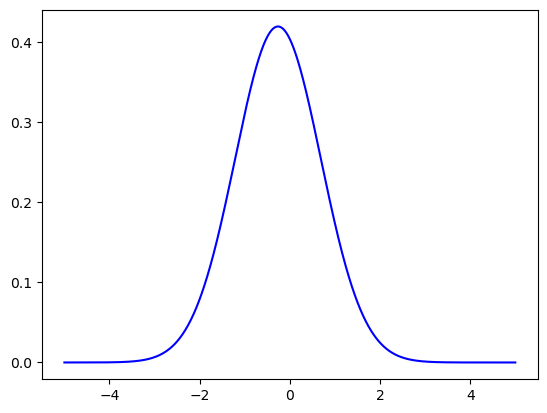

In [43]:
#try to fit a distribution
normaldist = NormalDist.from_samples(lots['ratio_auction_performance'])
x = np.arange(-5, 5, 0.001)
sns.lineplot(x = x, y = norm.pdf(x, normaldist.mean, normaldist.stdev), color='blue')
plt.show()

In [44]:
lots.describe()

,auction_id,estimated_price,starting_price,is_delivery,lot_quantity,category_id,is_offered,is_sold,has_bids,nr_bids,highest_valid_bid_amount,nr_valid_bid_users,ratio_auction_performance
count,6.736830e+05,6.736900e+05,6.736900e+05,673690.000000,673690.000000,672909.000000,673690.000000,673690.000000,673690.0,673690.000000,6.736900e+05,673690.000000,673690.000000
mean,9.950474e+05,1.872341e+03,3.438852e+02,0.051265,2.327807,3761.674113,0.998182,0.818771,1.0,16.116769,1.241320e+03,5.499466,-0.263655
std,8.098825e+04,2.447531e+04,5.201028e+03,0.220539,4.165307,1039.554944,0.042603,0.385208,0.0,16.103300,1.028626e+04,4.157063,0.950572
min,2.892030e+05,2.000000e+00,0.000000e+00,0.000000,1.000000,5.000000,0.000000,0.000000,1.0,1.000000,1.000000e+00,1.000000,-11.225243
25%,9.218010e+05,5.000000e+01,1.000000e+01,0.000000,1.000000,3048.000000,1.000000,1.000000,1.0,4.000000,5.000000e+01,2.000000,-0.884268
50%,9.952950e+05,1.500000e+02,1.500000e+01,0.000000,1.000000,3476.000000,1.000000,1.000000,1.0,12.000000,1.250000e+02,5.000000,-0.265703
75%,1.082698e+06,5.000000e+02,1.000000e+02,0.000000,1.000000,4487.000000,1.000000,1.000000,1.0,23.000000,4.100000e+02,7.000000,0.310155
max,1.117122e+06,1.000000e+07,2.250000e+06,1.000000,30.000000,6650.000000,1.000000,1.000000,1.0,213.000000,5.000000e+06,60.000000,13.122363
